In [13]:
import pdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
import pickle as pkl
import glob

pylab.rcParams['figure.figsize'] = (10., 10.)
%matplotlib inline

In [1]:
cd ..

/home/users/cornkle/pythonWorkspace/proj_CEH


In [14]:
cp4_path = '/home/users/cornkle/lmcs/cklein/CP_models/MCS_files/CP4_box_JASMIN/'

<xarray.DataArray 'pblH' ()>
array(1099.99854822)
<xarray.DataArray 'pblH' ()>
array(1162.52179132)


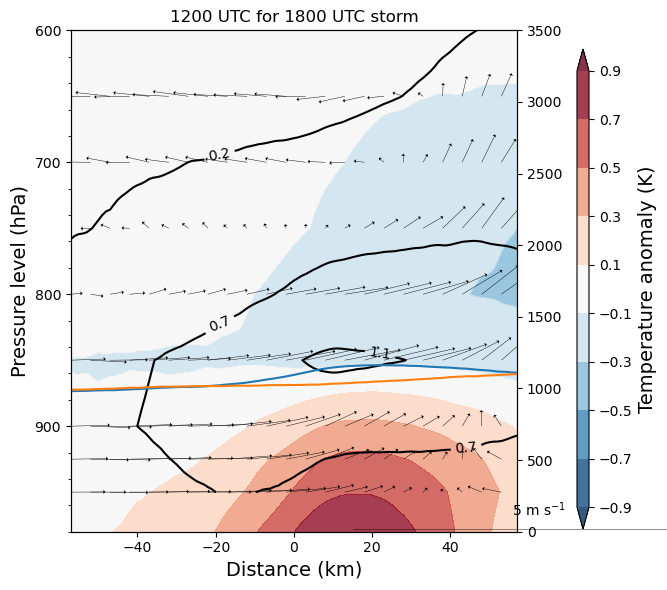

In [44]:
file = 'hist_anom_all_18h_XDIR.nc'
filem = 'hist_mean_all_18h_XDIR.nc'
file2 = 'fut_anom_all_18h_XDIR.nc'

file2d = 'hist_anom_all_18h_2d.nc'
file2d2 = 'fut_anom_all_18h_2d.nc'


ds = xr.open_dataset(cp4_path+file)
ds2 = xr.open_dataset(cp4_path+file2)

ds_mean = xr.open_dataset(cp4_path+filem)
ds2d = xr.open_dataset(cp4_path+file2d)
ds2d2 = xr.open_dataset(cp4_path+file2d2)

ds2d = ds2d.sel(latitude=slice(-6,6)).mean('latitude')
ds2d2 = ds2d2.sel(latitude=slice(-6,6)).mean('latitude')
ds3 = ds2d[['t2', 'q2']].rename({'t2' : 't_cross', 'q2' : 'q_cross'})
ds32 = ds2d2[['t2', 'q2']].rename({'t2' : 't_cross', 'q2' : 'q_cross'})

merged_hist = ds[['t_cross', 'q_cross']]
merged_fut = ds2[['t_cross', 'q_cross']]

# Add pressure level dimension to the extra dataset
pressure_level_980 = 980  # Define the pressure level value
ds3 = ds3.expand_dims(dim={'pressure': [pressure_level_980]})
ds3 = ds3.assign_coords(pressure=('pressure', [pressure_level_980]))
merged_hist = xr.concat([ds3, merged_hist], dim='pressure')

ds32 = ds32.expand_dims(dim={'pressure': [pressure_level_980]})
ds32 = ds32.assign_coords(pressure=('pressure', [pressure_level_980]))
merged_fut = xr.concat([ds32, merged_fut], dim='pressure')
###########################

from matplotlib.ticker import MultipleLocator, AutoMinorLocator
st=1
sarrow = 0

lowres= 5

ucross = ds['u_cross']
cross = ds['omega_cross']*3

xquiv = ucross.longitude[sarrow::lowres]
yquiv = ucross.pressure[sarrow::st]

uu = ucross[sarrow::st, sarrow::lowres]
vv = cross[sarrow::st, sarrow::lowres]

f = plt.figure(figsize=(6,6), dpi=100)
ax = f.add_subplot(111)

mp=ax.contourf(merged_hist.longitude, merged_hist.pressure, (merged_hist['t_cross']), cmap='RdBu_r',levels=np.linspace(-0.9,0.9,10), alpha=0.8, extend='both') #levels=np.linspace(-70,5,50), 

plt.gca().invert_yaxis()

qv = ax.quiver(xquiv, yquiv, uu, vv*-1, scale=6, width=0.001, headwidth=9)
plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')

num = ax.contour(ds_mean.longitude, ds_mean.pressure, (ds['q_cross'])*1000, colors='k',levels=np.linspace(-2,2,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
#ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')

# Set major ticks locator for the y-axis to be every 100 steps
ax.yaxis.set_major_locator(MultipleLocator(100))

# Set minor ticks locator for the y-axis to be every 20 steps
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_ylim(980,600)

ax.set_xlabel('Distance (km)', fontsize=14)
ax.set_ylabel('Pressure level (hPa)', fontsize=14)
ax2 = ax.twinx()
ax2.plot(merged_hist.longitude, ds_mean['pblH'])
ax2.plot(ds_mean.longitude, ds_mean['pblH']-ds['pblH'])
ax2.set_ylim(0,3500)
print((ds_mean['pblH']-ds['pblH']).max())
print((ds_mean['pblH']).max())

plt.title('', fontsize=14)

# cbar.label('Relative humidity (%)')
plt.title('1200 UTC for 1800 UTC storm')

plt.tight_layout()
f.subplots_adjust(right=0.87)
cax = f.add_axes([0.97, 0.11, 0.02, 0.8])
cbar = f.colorbar(mp, cax)
cbar.set_label('Temperature anomaly (K)', fontsize=14)


f.savefig('cross_18hstorms_xdir.png')

<xarray.DataArray 'pblH' ()>
array(1368.58919602)
<xarray.DataArray 'pblH' ()>
array(1300.90550369)


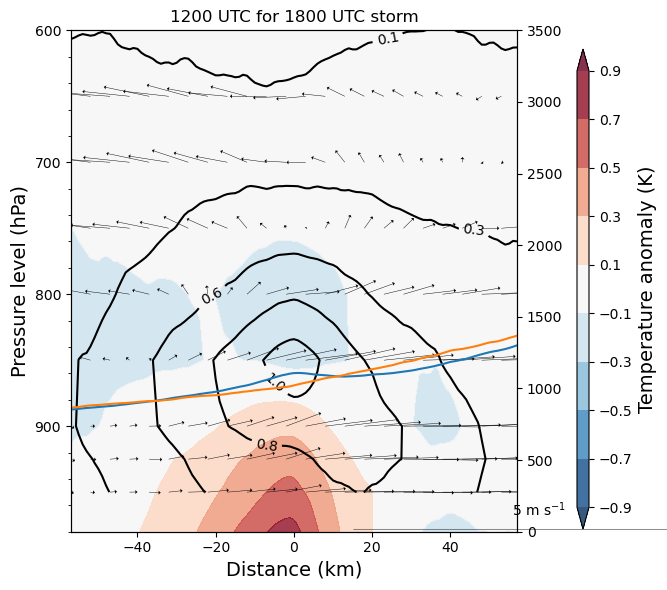

In [45]:
file = 'hist_anom_all_18h_YDIR.nc'
filem = 'hist_mean_all_18h_YDIR.nc'
file2 = 'fut_anom_all_18h_YDIR.nc'

file2d = 'hist_anom_all_18h_2d.nc'
file2d2 = 'fut_anom_all_18h_2d.nc'

ds = xr.open_dataset(cp4_path+file)
ds2 = xr.open_dataset(cp4_path+file2)

ds_mean = xr.open_dataset(cp4_path+filem)
ds2d = xr.open_dataset(cp4_path+file2d)
ds2d2 = xr.open_dataset(cp4_path+file2d2)

ds2d = ds2d.sel(longitude=slice(-6,6)).mean('longitude')
ds2d2 = ds2d2.sel(longitude=slice(-6,6)).mean('longitude')
ds3 = ds2d[['t2', 'q2']].rename({'t2' : 't_cross', 'q2' : 'q_cross'})
ds32 = ds2d2[['t2', 'q2']].rename({'t2' : 't_cross', 'q2' : 'q_cross'})

merged_hist = ds[['t_cross', 'q_cross']]
merged_fut = ds2[['t_cross', 'q_cross']]

# Add pressure level dimension to the extra dataset
pressure_level_980 = 980  # Define the pressure level value
ds3 = ds3.expand_dims(dim={'pressure': [pressure_level_980]})
ds3 = ds3.assign_coords(pressure=('pressure', [pressure_level_980]))
merged_hist = xr.concat([ds3, merged_hist], dim='pressure')

ds32 = ds32.expand_dims(dim={'pressure': [pressure_level_980]})
ds32 = ds32.assign_coords(pressure=('pressure', [pressure_level_980]))
merged_fut = xr.concat([ds32, merged_fut], dim='pressure')
###########################

st=1
sarrow = 0

lowres= 5

ucross = ds['u_cross']
cross = ds['omega_cross']*3

xquiv = ucross.latitude[sarrow::lowres]
yquiv = ucross.pressure[sarrow::st]

uu = ucross[sarrow::st, sarrow::lowres]
vv = cross[sarrow::st, sarrow::lowres]

f = plt.figure(figsize=(6,6), dpi=100)
ax = f.add_subplot(111)

mp=ax.contourf(merged_hist.latitude, merged_hist.pressure, (merged_hist['t_cross']), cmap='RdBu_r',levels=np.linspace(-0.9,0.9,10), alpha=0.8, extend='both') #levels=np.linspace(-70,5,50), 

plt.gca().invert_yaxis()

qv = ax.quiver(xquiv, yquiv, uu, vv*-1, scale=6, width=0.001, headwidth=9)
plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')

num = ax.contour(ds_mean.latitude, ds_mean.pressure, (ds['q_cross'])*1000, colors='k',levels=np.linspace(-1,1,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
#ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')


# Set major ticks locator for the y-axis to be every 100 steps
ax.yaxis.set_major_locator(MultipleLocator(100))

# Set minor ticks locator for the y-axis to be every 20 steps
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_ylim(980,600)

ax.set_xlabel('Distance (km)', fontsize=14)
ax.set_ylabel('Pressure level (hPa)', fontsize=14)
ax2 = ax.twinx()
ax2.plot(merged_hist.latitude, ds_mean['pblH'])
ax2.plot(ds_mean.latitude, ds_mean['pblH']-ds['pblH'])
ax2.set_ylim(0,3500)
print((ds_mean['pblH']-ds['pblH']).max())
print((ds_mean['pblH']).max())

plt.title('', fontsize=14)

# cbar.label('Relative humidity (%)')
plt.title('1200 UTC for 1800 UTC storm')
plt.tight_layout()

f.subplots_adjust(right=0.87)
cax = f.add_axes([0.97, 0.11, 0.02, 0.8])
cbar = f.colorbar(mp, cax)
cbar.set_label('Temperature anomaly (K)', fontsize=14)


f.savefig('cross_18hstorms_ydir.png')

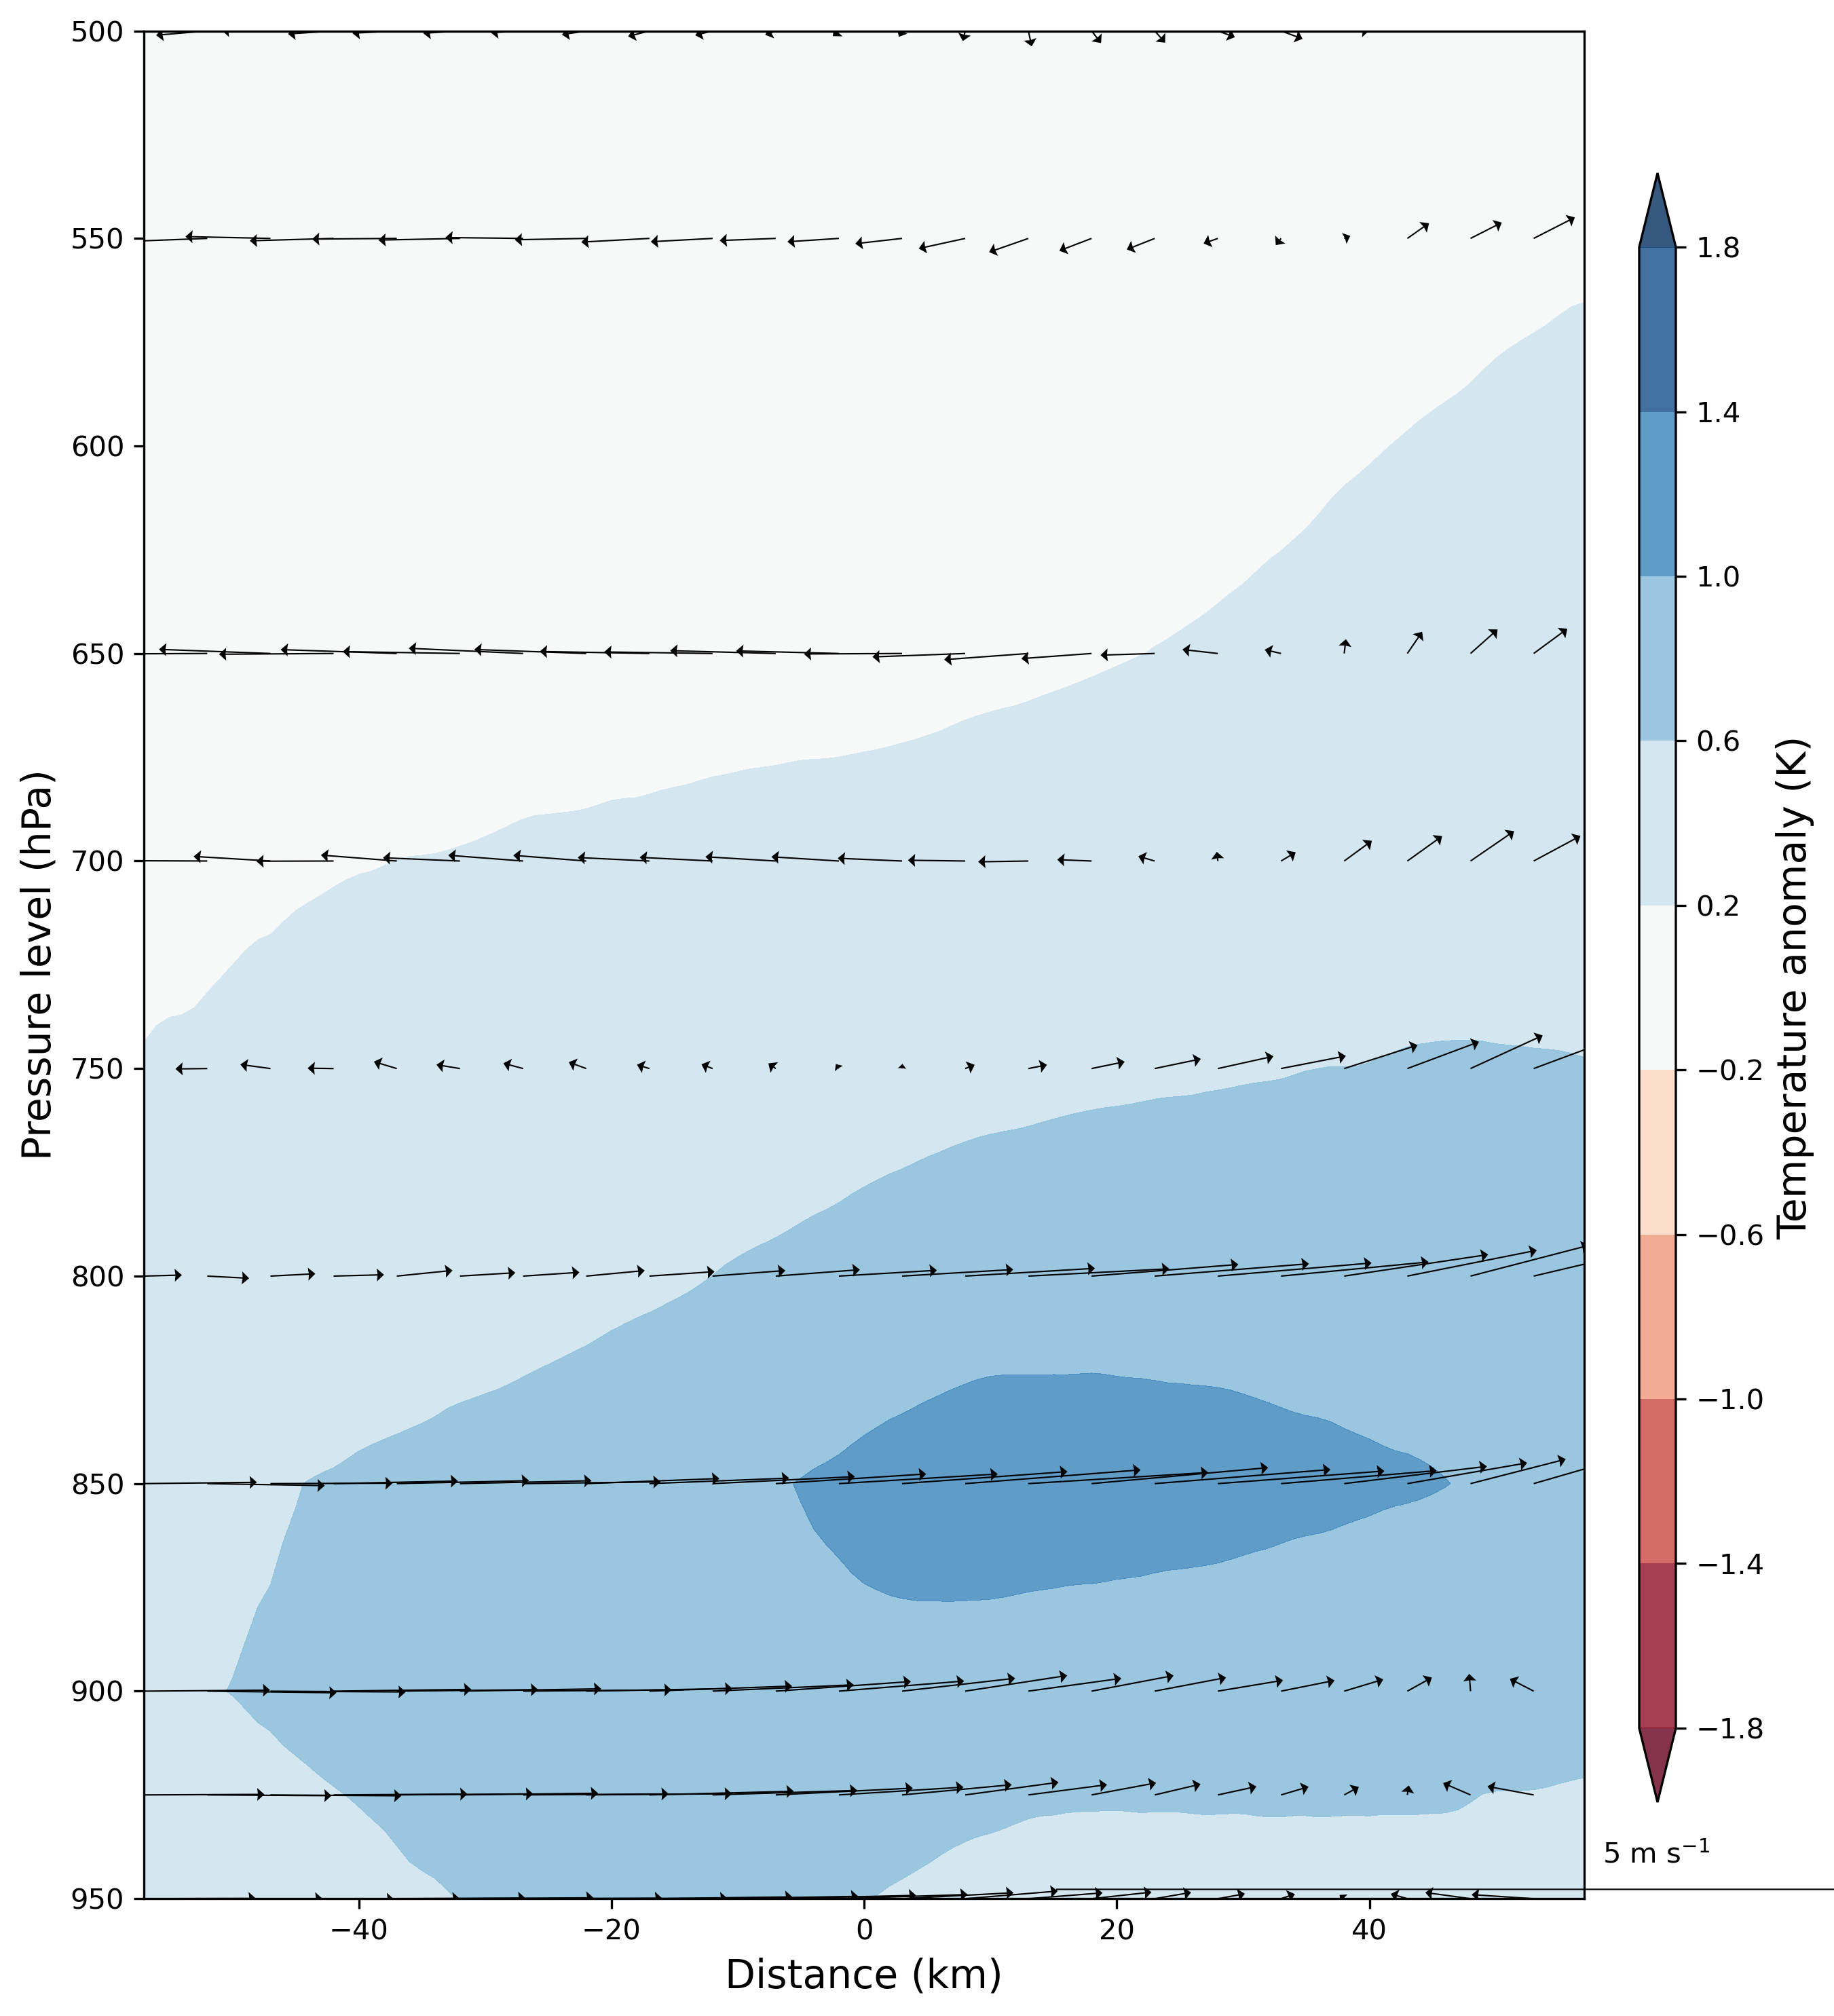

In [133]:
st=1
sarrow = 0
lowres= 5

ucross = ds['u_cross']
cross = ds['omega_cross']

xquiv = ucross.longitude[sarrow::lowres]
yquiv = ucross.pressure[sarrow::st]

uu = ucross[sarrow::st, sarrow::lowres]
vv = cross[sarrow::st, sarrow::lowres]

f = plt.figure(figsize=(9,10), dpi=300)
ax = f.add_subplot(111)

mp=ax.contourf(cross.longitude, cross.pressure, (ds['q_cross'])*1000, cmap='RdBu',levels=np.linspace(-1.8,1.8,10), alpha=0.8, extend='both') #levels=np.linspace(-70,5,50), 

plt.gca().invert_yaxis()

qv = ax.quiver(xquiv, yquiv, uu, vv*-1, scale=6, width=0.001, headwidth=9)
plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')
 
ax.set_xlabel('Distance (km)', fontsize=14)
ax.set_ylabel('Pressure level (hPa)', fontsize=14)

plt.title('', fontsize=14)
# cbar.label('Relative humidity (%)')

plt.tight_layout()

f.subplots_adjust(right=0.87)
cax = f.add_axes([0.9, 0.11, 0.02, 0.8])
cbar = f.colorbar(mp, cax)
cbar.set_label('Temperature anomaly (K)', fontsize=14)

#f.savefig('mcs_crosssec.png')

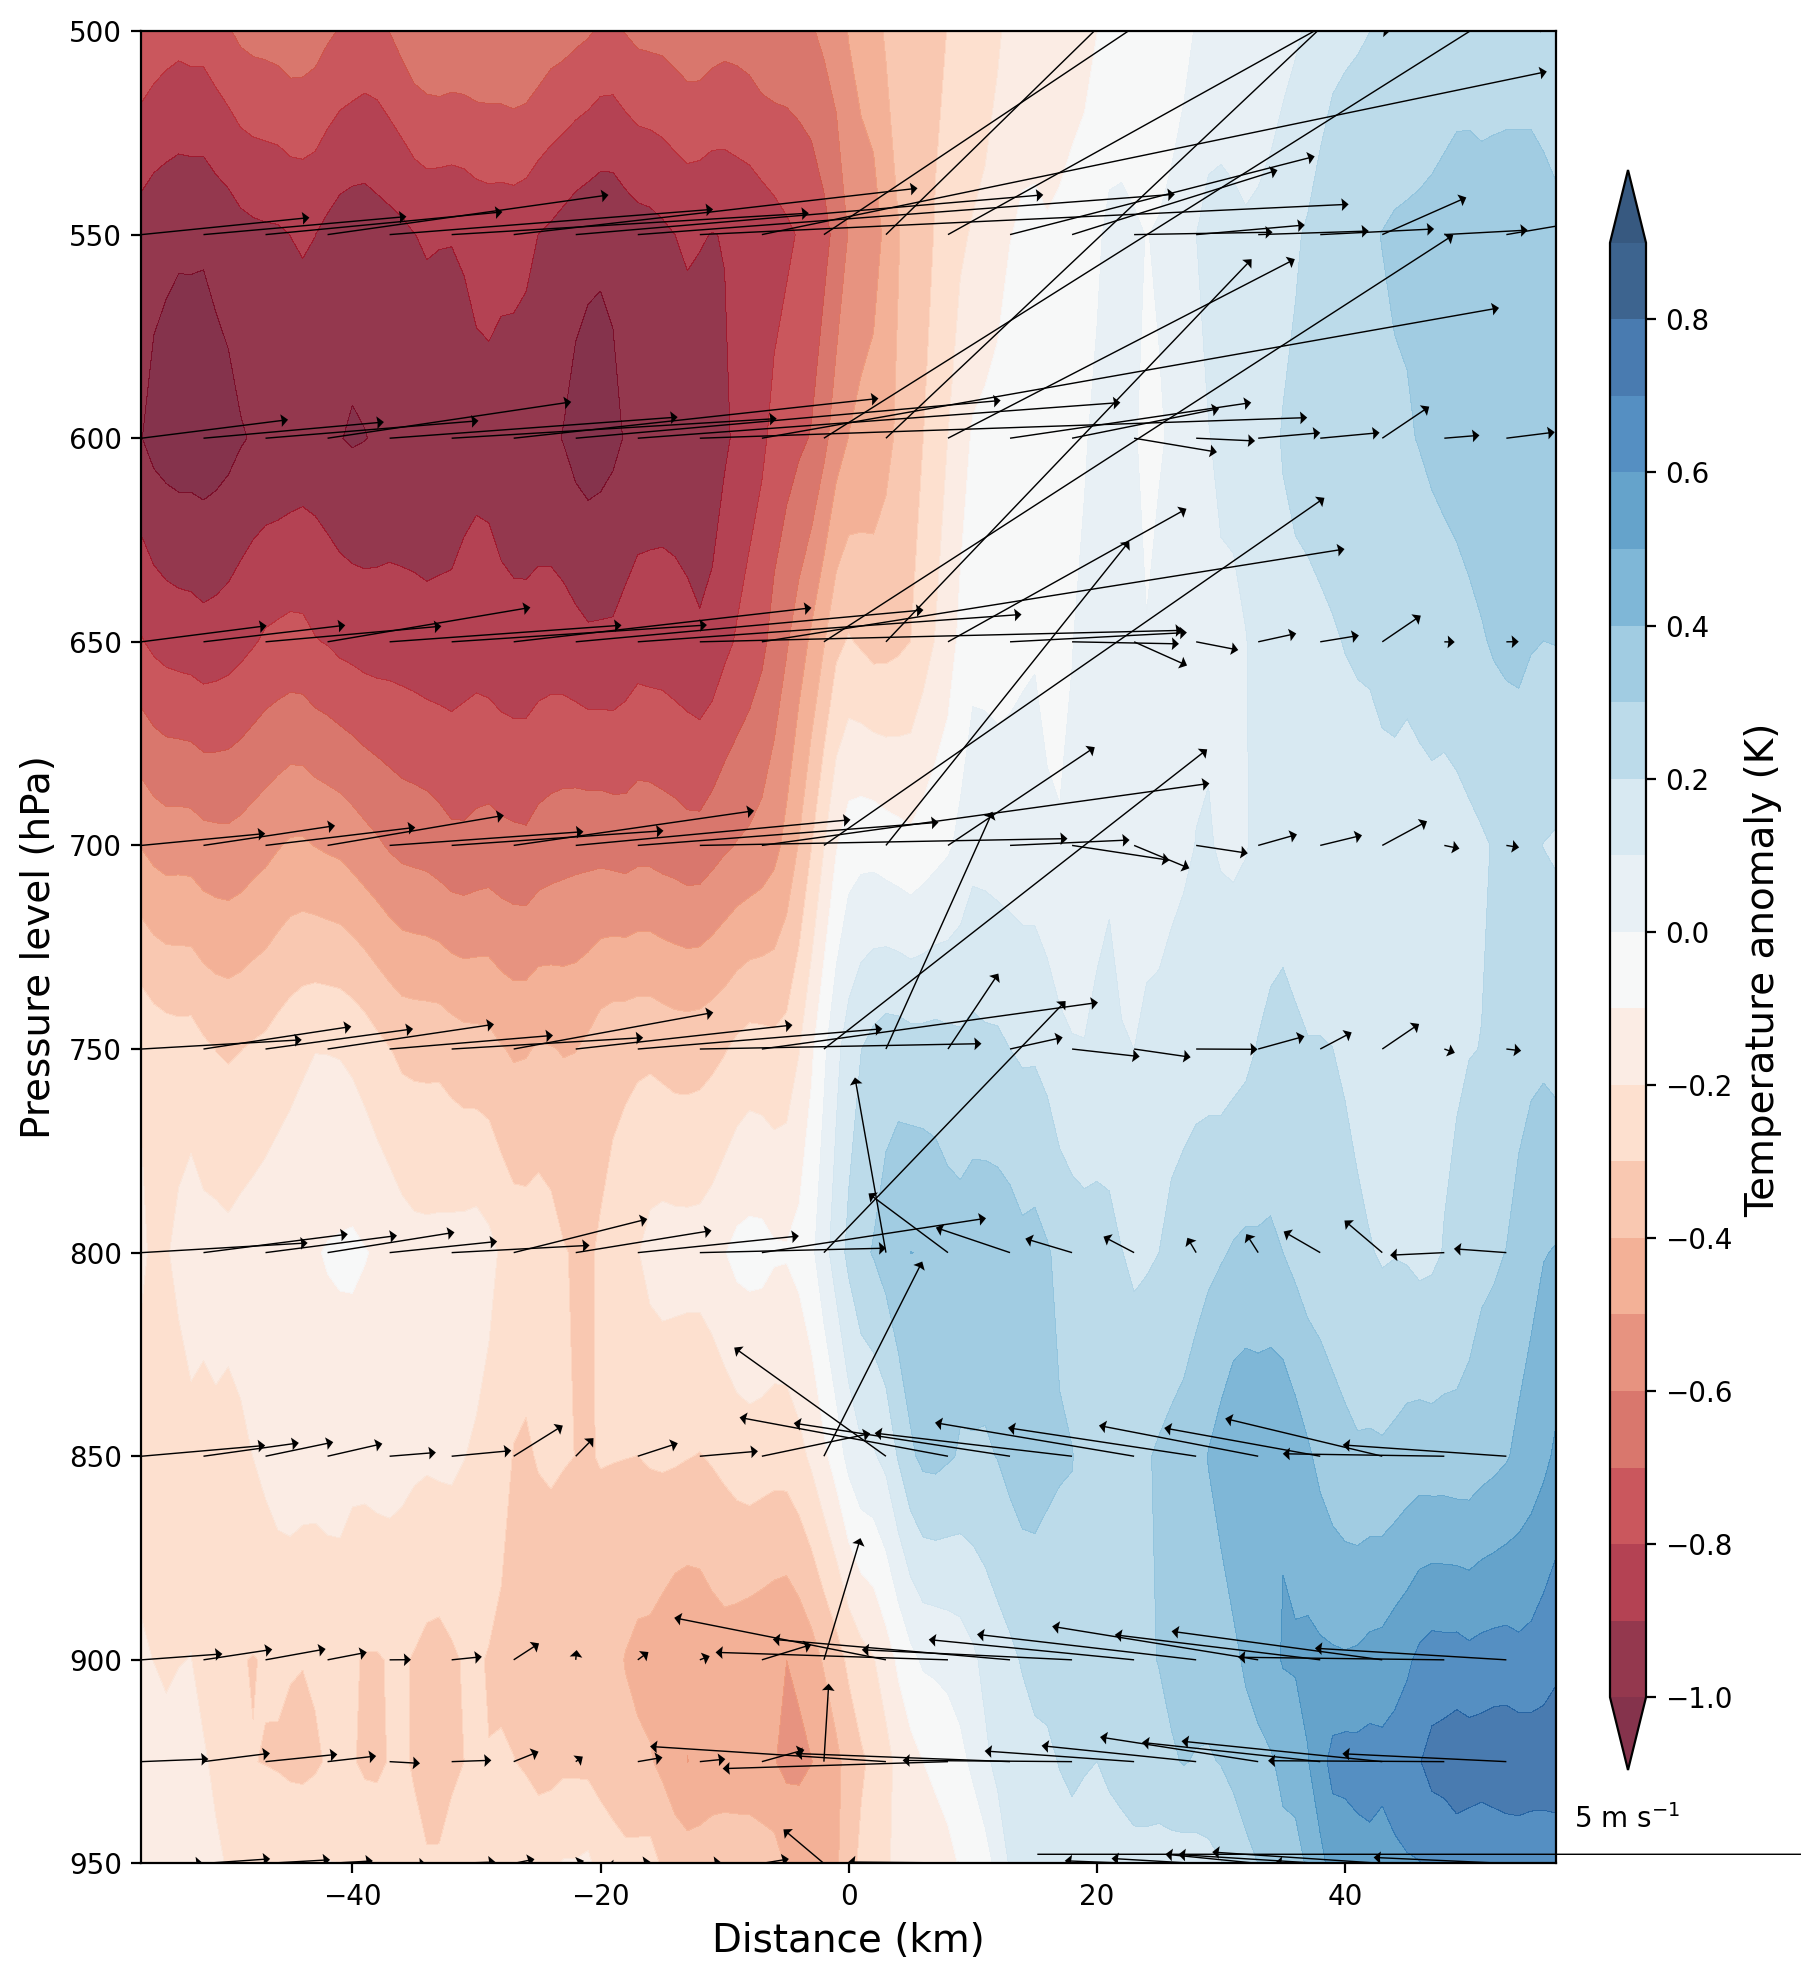

In [17]:
file = 'FUT_anom_allMonths_18h_XDIR.nc'
ds = xr.open_dataset(cp4_path+file)


st=1
sarrow = 0
lowres= 5

ucross = ds['u_cross_ST']
cross = ds['omega_cross_ST']

xquiv = ucross.longitude[sarrow::lowres]
yquiv = ucross.pressure[sarrow::st]

uu = ucross[sarrow::st, sarrow::lowres]
vv = cross[sarrow::st, sarrow::lowres]

f = plt.figure(figsize=(9,10), dpi=200)
ax = f.add_subplot(111)

mp=ax.contourf(cross.longitude, cross.pressure, (ds['v_cross_ST']), cmap='RdBu',levels=np.arange(-1,1,0.1), alpha=0.8, extend='both') #levels=np.linspace(-70,5,50), 

plt.gca().invert_yaxis()

qv = ax.quiver(xquiv, yquiv, uu, vv*-1, scale=6, width=0.001, headwidth=9)
plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')
 
ax.set_xlabel('Distance (km)', fontsize=14)
ax.set_ylabel('Pressure level (hPa)', fontsize=14)

plt.title('', fontsize=14)
# cbar.label('Relative humidity (%)')

plt.tight_layout()

f.subplots_adjust(right=0.87)
cax = f.add_axes([0.9, 0.11, 0.02, 0.8])
cbar = f.colorbar(mp, cax)
cbar.set_label('Temperature anomaly (K)', fontsize=14)

#f.savefig('mcs_crosssec.png')